In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.cluster import DBSCAN
! pip install kmodes
from kmodes.kmodes import KModes



Information from Bruhn et al "The Impact of High School Financial Education: Evidence from a Large-Scale Evaluation in Brazil" Read_me.txt file:
- school_admin_data_final.dta contains grade level passing, failing, and dropout rates from administrative school data 
- school_intervention_panel_final.dta contains underlying variables used in the analysis, as well as dummy variables generated based on the underlying data. 
    - Variables with "_bl" at the end are from the baseline survey. 
    - Variables with "_fu" at the end are from the follow-up survey.
    - The data is stacked for the first and second follow-up surveys, with variable round==0 denoting the first follow-up and round==1 the second follow-up.
    - Variables with a "p" after the number in the variables name, e.g. "rp_09p_bl" come from the parent questionnaire.

In [3]:
#load the datasets into a pandas DataFrame
df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)

/tmp/ipykernel_207/4246522230.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)


In [4]:
df = df.rename(columns={
    'female' : 'Student is female (Baseline)',
    'miss_f_coded' : 'Student gender could not be coded based on name (Baseline)',
    'dumm_rp_08_bl' : 'Education of mother: At least some secondary (Baseline)',
    'dumm_rp_09_bl' : 'Education of father: At least some secondary (Baseline)',
    'dumm_rp_14_bl' : 'Student\'s Family receives Bolsa Familia cash transfer (Baseline)',
    'dumm_rp_23_bl' : 'Student has computer with internet at home (Baseline)',
    'dumm_rp_24_bl' : 'Student has failed at least one school year (Baseline)',
    'dumm_rp_49_bl' : 'Student is not working at the moment (Baseline)',
    'business_bl' : 'Student works in own or family business (Baseline)',
    'employee_bl' : 'Student works as employee or other (Baseline)',
    'dumm_rp_50_bl' : 'Student receives income (Baseline)',
    'dumm_rp_53B_bl' : 'Student part of income saved is non-zero (Baseline)',
    'dumm_rp_55_bl' : 'Student has borrowed money (any source) (Baseline)',
    'dumm_rp_56_bl' : 'Student is behind on payments (unconditional) (Baseline)',
    'dumm_rp_57s_bl' : 'Student is behind on payments to store (Baseline)',
    'dumm_rp_57i_bl' : 'Student is behind on payments to family friends or other people (Baseline)',
    'dumm_rp_57f_bl' : 'Student is behind on payments to bank or FI (Baseline)',
    'dumm_rp_59_bl' : 'Student says they are a saver (Baseline)',
    'dumm_rp_61_bl' : 'Student has formal savings (Baseline)',
    'dumm_rp_64A_bl' : 'Student makes a list of all monthly expenses (Baseline)',
    'dumm_rp_65A_bl': 'Student saves money for future purchases (Baseline)',
    'dumm_rp88__92C_bl': 'Student has bought electronics shoes or clothing with credit card (Baseline)',
    'dumm_rp88__92D_bl': 'Student has bought electronics shoes or clothing on installments (Baseline)',
    'dumm_rp88__92AB_bl': 'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
    'dumm_negotiates_bl': 'Student negotiates prices or payment methods (Baseline)',
    'dumm_search_bl': 'Student comparison shops before making purchase (Baseline)',
    'dumm_rp_08p_bl': 'Parent has at least some secondary education (Baseline)',
    'p_employee_bl': 'Parent is an employee (Baseline)',
    'p_selfempl_bl': 'Parent is self-employeed (Baseline)',
    'p_other_bl': 'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)',
    'dumm_rp_14p_bl': 'Parent: makes a list of all monthly expenses (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has checking account (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has savings account (Baseline)',
    'dumm_rp_19p_bl': 'Parent: has debit card (Baseline)',
    'dumm_rp_23p_bl': 'Parent: has checks (Baseline)',
    'dumm_formal_saving_bl':' Parent: has formal savings (Baseline)',
    'dumm_rp_33p_bl': 'Parent: Student talks to you about finances (Baseline)',
    'dumm_rp_34p_bl': 'Parent: Student helps organize HH budget (Baseline)',
    'dumm_rp_36p_bl': 'Parent: Prefers R50K plus 15 percent interest (Baseline)',
    'dumm_rp_37p_bl': 'Parent: Inflation question dummy for correct (Baseline)',
    'vl_proficiencia_bl': 'Student: Finanical Proficieny Score (Baseline)', 
    'dumm_rp_49_fup' : "Student is not working at the moment" ,  
    'business_fup' : 'Student works in own or family busines' ,
    'employee_fup' : 'Student works as employee or other', 
    'dumm_rp_50_fup': 'Student: Receives income' ,
     'dumm_rp_53B_fup': 'Student: Pct of income saved is non-zero', 
    'dumm_rp_55_fup': 'Student: Has borrowed money (any source)',
    'dumm_rp_56_fup' : 'Student: Is behind on payments (unconditional)',
    'dumm_rp_57f_fup' : 'Student: Is behind on payments to bank or FI' ,
    'dumm_rp_57s_fup' : 'Student: Is behind on payments to store',
    'dumm_rp_57i_fup': 'Student: Is behind on payments to family friends or other people', 
    'dumm_rp_59_fup' : 'Student: Says they are a saver' , 
    'dumm_rp_61_fup' : 'Student: Has formal savings', 
    'dumm_rp_64A_fup' : 'I make a list of all monthly expenses', 
    'dumm_rp_65A_fup' : 'Student: Saves money for future purchases',
    'dumm_rp_88C_fup': 'Student: I have bought cell phone with credit card', 
    'dumm_rp_88D_fup': 'Student: I have bought cell phone on installments',
    'dumm_rp_88AB_fup': 'Student: I have bought a cell phone with cash/debit card',
    'dumm_rp_89C_fup': 'Student: I have bought computer with credit card' ,
    'dumm_rp_89D_fup': 'Student: I have bought computer on installments' ,
    'dumm_rp_89AB_fup': 'Student: I have bought a computer with cash/debit card' ,
    'dumm_rp_90C_fup': 'Student: I have bought an electronic device with credit card' ,
    'dumm_rp_90D_fup': 'Student: I have bought an electronic device on installments' ,
    'dumm_rp_90AB_fup': 'Student: I have bought an electronic device with cash/debit card' ,
    'dumm_rp_91C_fup': 'Student: I have bought shoes with credit card' ,
    'dumm_rp_91D_fup': 'Student: I have bought shoes on installments' ,
    'dumm_rp_91AB_fup': 'Student: I have bought shoes with cash/debit card',
    'dumm_rp_92C_fup': 'Student: I have bought clothing with credit card', 
    'dumm_rp_92D_fup': 'Student: I have bought clothing on installments' ,
    'dumm_rp_92AB_fup' : 'Student: I have bought clothing with cash/debit card',
    'dumm_rp88__92C_fup': 'I have bought electronics shoes or clothing with credit card',
    'dumm_rp88__92D_fup': 'I have bought electronics shoes or clothing on installments' ,
    'dumm_rp88__92AB_fup': 'I have bought electronics shoes or clothing with cash/debit card' ,
    'dumm_rp_93_fup': 'I negotiate the price' ,
    'dumm_rp_94_fup': 'Student I search price in different stores',
    'dumm_rp_95_fup': 'Student I negotiate the payment method' ,
    'dumm_rp_96_fup': 'Student: I search similar models/brands' ,
    'dumm_negotiates_fup': 'Student Negotiates prices or payment methods' ,
    'dumm_search_fup': 'Student Comparison shops before making purchase' ,
    'dumm_rp_08p_fup': 'Parent has at least some secondary education' ,
    'p_employee_fup': 'Parent is an employee' ,
    'p_selfempl_fup': 'Student Parent is self-employeed',
    'p_other_fup': 'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'dumm_rp_14p_fup': 'Parent: makes a list of all monthly expenses',
    'dumm_rp_18p_fup' : 'Parent: has checking account', 
    'dumm_rp_19p_fup': 'Parent: savings account', 
    'dumm_rp_21p_fup': 'Parent has debit card' ,
    'dumm_rp_23p_fup': 'Parent has checks' ,
    'dumm_formal_saving_fup': 'Parent has formal savings',
    'dumm_rp_33p_fup': 'Parent: Student talks to you about finances' ,
    'dumm_rp_34p_fup': 'Parent: student helps organize HH budget',
    'dumm_rp_36p_fup' : 'Parent: prefers R50K plus 15 percent interest (follow up)',
    'dumm_rp_37p_fup' : 'Parent: Inflation question dummy for correct  (follow up)', 
    'dumm_rp_41p_fup' : 'Parent: budget must have income and expenses (follow up)',

})
column_names = df.columns.tolist()
print(column_names)

['id_geral', 'cd_escola', 'nm_uf_bl', 'matriculas', 'docentes', 'abandonona1sriemdio', 'aprovaona1sriemdio', 'treatment', 'pair_all', 'treatment_workshop', 'strata', 'round', 'female_coded', 'rp_01_bl', 'rp_08_bl', 'rp_09_bl', 'rp_14_bl', 'rp_23_bl', 'rp_24_bl', 'Student: Finanical Proficieny Score (Baseline)', 'bl_test', 'rp_49_bl', 'rp_50_bl', 'rp_53_bl', 'rp_55_bl', 'rp_56_bl', 'rp_57_bl', 'rp_59_bl', 'rp_61_bl', 'rp_64_bl', 'rp_65_bl', 'rp_88_bl', 'rp_89_bl', 'rp_90_bl', 'rp_91_bl', 'rp_92_bl', 'rp_93_bl', 'rp_94_bl', 'rp_95_bl', 'rp_96_bl', 'bl_aluno', 'rp_08p_bl', 'rp_09p_bl', 'rp_14p_bl', 'rp_18p_bl', 'rp_19p_bl', 'rp_21p_bl', 'rp_23p_bl', 'rp_33p_bl', 'rp_34p_bl', 'rp_36p_bl', 'rp_37p_bl', 'vl_proficiencia_fup', 'fu1_test', 'rp_55_fup', 'rp_57_fup', 'rp_49_fup', 'rp_50_fup', 'rp_53_fup', 'rp_56_fup', 'rp_59_fup', 'rp_61_fup', 'rp_64_fup', 'rp_65_fup', 'rp_88_fup', 'rp_89_fup', 'rp_90_fup', 'rp_91_fup', 'rp_92_fup', 'rp_93_fup', 'rp_94_fup', 'rp_95_fup', 'rp_96_fup', 'fu1_aluno'

In [5]:
#useful subdata sets 
follow_up_1_df = df[df['round'] == 0]

In [6]:
selected_columns = [
    'Student is female (Baseline)', 'Education of mother: At least some secondary (Baseline)', 
    'Education of father: At least some secondary (Baseline)', 
    "Student's Family receives Bolsa Familia cash transfer (Baseline)", 
    'Student has computer with internet at home (Baseline)', 
    'Student has failed at least one school year (Baseline)', 
    'Student is not working at the moment (Baseline)', 
    'Student works in own or family business (Baseline)', 
    'Student works as employee or other (Baseline)', 
    'Student receives income (Baseline)', 
    'Student part of income saved is non-zero (Baseline)', 
    'Student has borrowed money (any source) (Baseline)', 
    'Student is behind on payments (unconditional) (Baseline)', 
    'Student is behind on payments to bank or FI (Baseline)', 
    'Student is behind on payments to store (Baseline)', 
    'Student is behind on payments to family friends or other people (Baseline)', 
    'Student says they are a saver (Baseline)', 
    'Student has formal savings (Baseline)', 
    'Student makes a list of all monthly expenses (Baseline)', 
    'Student saves money for future purchases (Baseline)', 
    'Student has bought electronics shoes or clothing with credit card (Baseline)', 
    'Student has bought electronics shoes or clothing on installments (Baseline)', 
    'Student has bought electronics shoes or clothing with cash/debit card (Baseline)', 
    'Student negotiates prices or payment methods (Baseline)', 
    'Student comparison shops before making purchase (Baseline)', 
    'Parent has at least some secondary education (Baseline)', 
    'Parent is an employee (Baseline)', 'Parent is self-employeed (Baseline)', 
    'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
    'Parent: makes a list of all monthly expenses (Baseline)', 
    'Parent: has savings account (Baseline)', 'Parent: has debit card (Baseline)', 
    'dumm_rp_21p_bl', 'Parent: has checks (Baseline)', ' Parent: has formal savings (Baseline)', 
    'Parent: Student talks to you about finances (Baseline)', 
    'Parent: Student helps organize HH budget (Baseline)', 
    'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
    'Parent: Inflation question dummy for correct (Baseline)',
]

# Get the subset of the DataFrame
baseline_df = follow_up_1_df[selected_columns]
baseline_df = baseline_df.dropna()


baseline_array = baseline_df.values


## Clustering of the Students

In [ ]:
#clustering with only binary variables using kmodes
kmodes = KModes(n_clusters=111, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(baseline_df)
baseline_df['Cluster'] = clusters

In [7]:
# Assume df is your DataFrame with only binary variables
kmodes = KModes(n_clusters=10, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(baseline_df)
baseline_df['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5241, cost: 116672.0
Run 1, iteration: 2/100, moves: 22, cost: 116672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5501, cost: 114812.0
Run 2, iteration: 2/100, moves: 1081, cost: 114812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5615, cost: 114440.0
Run 3, iteration: 2/100, moves: 1621, cost: 114112.0
Run 3, iteration: 3/100, moves: 468, cost: 113855.0
Run 3, iteration: 4/100, moves: 302, cost: 113855.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4814, cost: 115476.0
Run 4, iteration: 2/100, moves: 1508, cost: 114721.0
Run 4, iteration: 3/100, moves: 446, cost: 114721.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/10

In [27]:
cluster_summary = baseline_df.groupby('Cluster').mean()
cluster_summary['Student has bought electronics shoes or clothing with credit card (Baseline)']

Cluster
0    0.166057
1    0.566810
2    0.163139
3    0.207026
4    0.167861
5    0.195980
6    0.170565
7    0.246132
8    0.241403
9    0.176661
Name: Student has bought electronics shoes or clothing with credit card (Baseline), dtype: float32

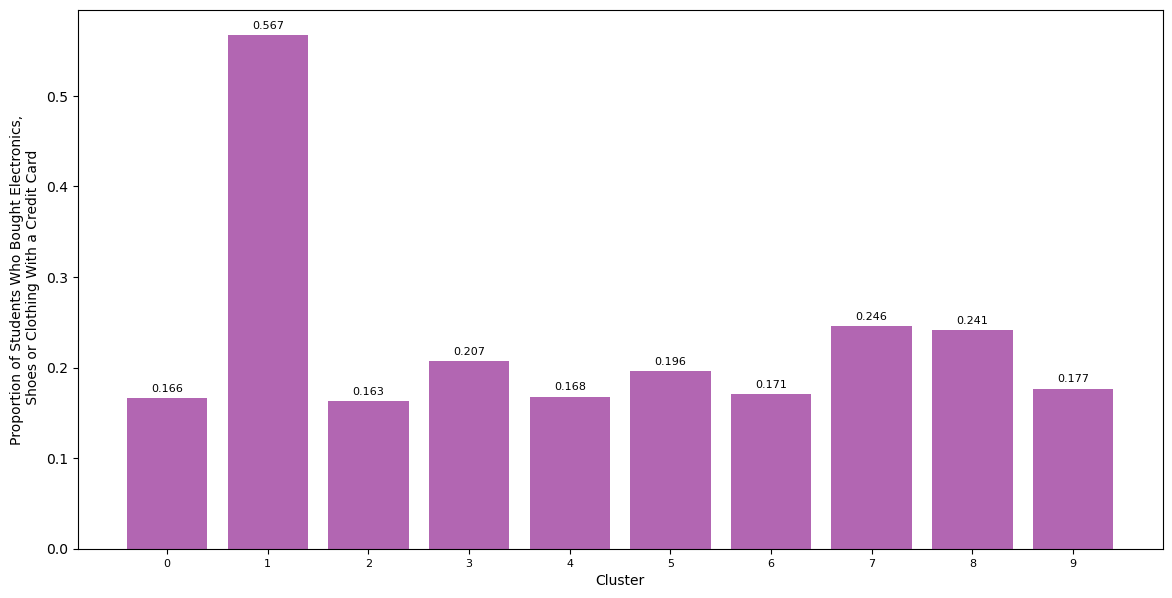

In [38]:
cluster_data = {
    'Cluster': list(range(10)),
    'Proportion': [0.166057, 0.566810, 0.163139, 0.207026, 0.167861, 0.195980, 0.170565, 0.246132, 0.241403, 0.176661]
}

cluster_df = pd.DataFrame(cluster_data)

# Plotting the cluster data in a similar style
fig, ax3 = plt.subplots(figsize=(14, 7))

bars3 = ax3.bar(cluster_df['Cluster'], cluster_df['Proportion'], color='purple', alpha=0.6)

# Annotate each bar with the proportion value
for i, val in enumerate(cluster_df['Proportion']):
    ax3.text(i, val + 0.005, f"{val:.3f}", ha='center', va='bottom', fontsize=8, color='black')

ax3.set_xlabel('Cluster', fontsize=10)
ax3.set_ylabel('Proportion of Students Who Bought Electronics,\n Shoes or Clothing With a Credit Card', fontsize=10)
ax3.set_xticks(np.arange(len(cluster_df['Cluster'])))
ax3.set_xticklabels(cluster_df['Cluster'], rotation=0, ha='center', fontsize=8)


# Show the chart
plt.show()

# Save the cluster data chart as an image
fig.savefig('cluster_proportions_chart.png', format='png', dpi=300)

In [39]:
cluster_1_data = baseline_df[baseline_df['Cluster'] == 1]

#summary of the characteristics for that cluster
cluster_1_summary = cluster_1_data.mean()
print(cluster_1_summary)

Student is female (Baseline)                                                         0.614224
Education of mother: At least some secondary (Baseline)                              0.366379
Education of father: At least some secondary (Baseline)                              0.324713
Student's Family receives Bolsa Familia cash transfer (Baseline)                     0.201149
Student has computer with internet at home (Baseline)                                0.277299
Student has failed at least one school year (Baseline)                               0.263649
Student is not working at the moment (Baseline)                                      0.440374
Student works in own or family business (Baseline)                                   0.098420
Student works as employee or other (Baseline)                                        0.341954
Student receives income (Baseline)                                                   0.890086
Student part of income saved is non-zero (Baseline)         

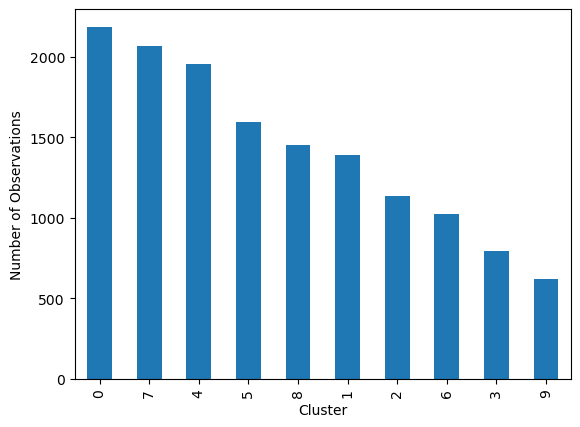

In [20]:
cluster_counts = baseline_df['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
#plt.title('Cluster Size Distribution')

plt.savefig('student_10cluster_numobs.png', format='png', dpi=300, bbox_inches='tight')

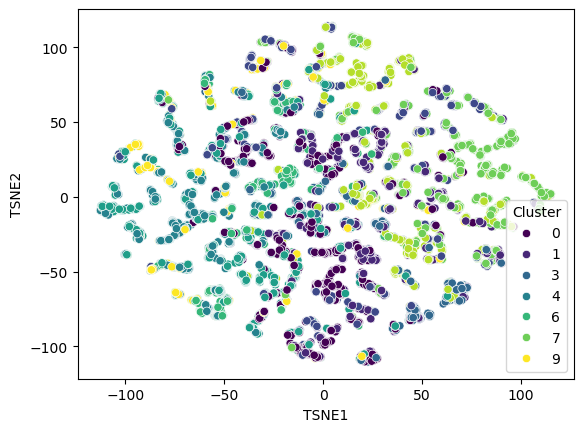

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(baseline_df.drop('Cluster', axis=1))

baseline_df['TSNE1'] = tsne_results[:, 0]
baseline_df['TSNE2'] = tsne_results[:, 1]
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=baseline_df, palette='viridis')
#plt.title('t-SNE Visualization of Clusters')
plt.savefig('TSNEgraph10.png', format='png', dpi=300, bbox_inches='tight')

## Clustering of the Variables
https://www.stata.com/manuals/mvcluster.pdf

### 3 clusters

In [25]:
baseline_df2 = follow_up_1_df[selected_columns]
baseline_df2 = baseline_df2.dropna()
outcome_df = baseline_df2.transpose()

In [24]:
kmodes = KModes(n_clusters=111, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(outcome_df)
outcome_df['Cluster'] = clusters

NameError: name 'outcome_df' is not defined

In [13]:
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(outcome_df)
outcome_df['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 166767.0
Run 1, iteration: 2/100, moves: 3, cost: 162711.0
Run 1, iteration: 3/100, moves: 1, cost: 162666.0
Run 1, iteration: 4/100, moves: 0, cost: 162666.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 162736.0
Run 2, iteration: 2/100, moves: 1, cost: 162736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 162736.0
Run 3, iteration: 2/100, moves: 1, cost: 162736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6, cost: 162736.0
Run 4, iteration: 2/100, moves: 1, cost: 162736.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4, cost: 166767.0
Run 5, iteration: 2/100, moves: 3, cost: 162711.0


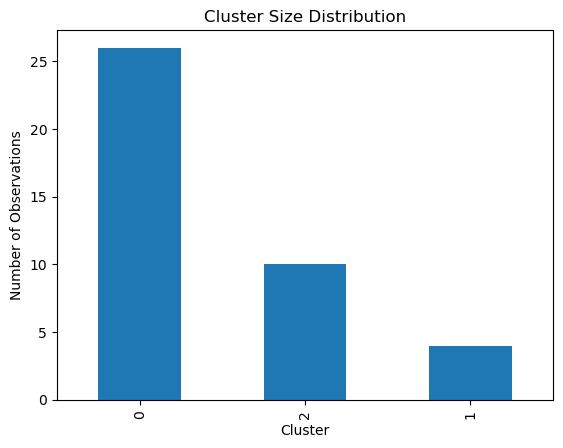

In [14]:
cluster_counts = outcome_df['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Cluster Size Distribution')
plt.show()

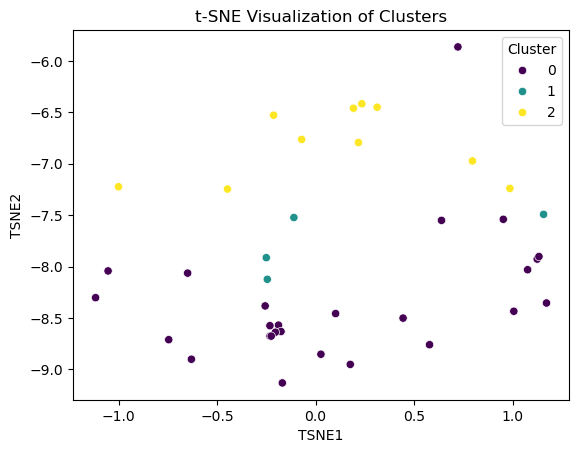

In [15]:
from sklearn.manifold import TSNE
temp = outcome_df.copy()

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(temp.drop('Cluster', axis=1))

# Plot
temp['TSNE1'] = tsne_results[:, 0]
temp['TSNE2'] = tsne_results[:, 1]
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=temp, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [25]:
for i in [0, 1, 2]: 
    desired_cluster = i  # Example: Cluster number 0
    cluster_observations = outcome_df[outcome_df['Cluster'] == desired_cluster]

    # Display the observations in the desired cluster
    print(cluster_observations.index)

Index(['Education of mother: At least some secondary (Baseline)',
       'Education of father: At least some secondary (Baseline)',
       'Student's Family receives Bolsa Familia cash transfer (Baseline)',
       'Student has failed at least one school year (Baseline)',
       'Student works in own or family business (Baseline)',
       'Student has borrowed money (any source) (Baseline)',
       'Student is behind on payments (unconditional) (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)',
       'Student is behind on payments to store (Baseline)',
       'Student is behind on payments to family friends or other people (Baseline)',
       'Student says they are a saver (Baseline)',
       'Student has formal savings (Baseline)',
       'Student makes a list of all monthly expenses (Baseline)',
       'Student saves money for future purchases (Baseline)',
       'Student has bought electronics shoes or clothing with credit card (Baseline)',
       'Student

### 4 clusters

In [33]:
#https://bookdown.org/robert_statmind/knn_kmeans/k-means-clustering-1.html#
baseline_df4 = follow_up_1_df[selected_columns]
baseline_df4 = baseline_df4.dropna()
outcome_df4 = baseline_df4.transpose()

In [34]:
kmodes = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(outcome_df4)
outcome_df4['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 148804.0
Run 1, iteration: 2/100, moves: 0, cost: 148804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 148804.0
Run 2, iteration: 2/100, moves: 0, cost: 148804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 148804.0
Run 3, iteration: 2/100, moves: 0, cost: 148804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4, cost: 148804.0
Run 4, iteration: 2/100, moves: 0, cost: 148804.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4, cost: 148804.0
Run 5, iteration: 2/100, moves: 0, cost: 148804.0
Best run was number 1


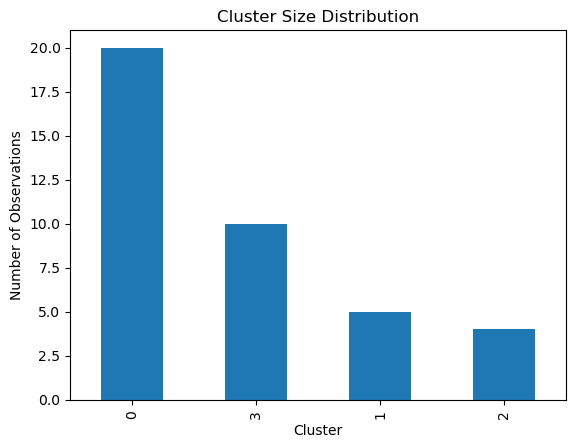

In [35]:
cluster_counts = outcome_df4['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Cluster Size Distribution')
plt.show()

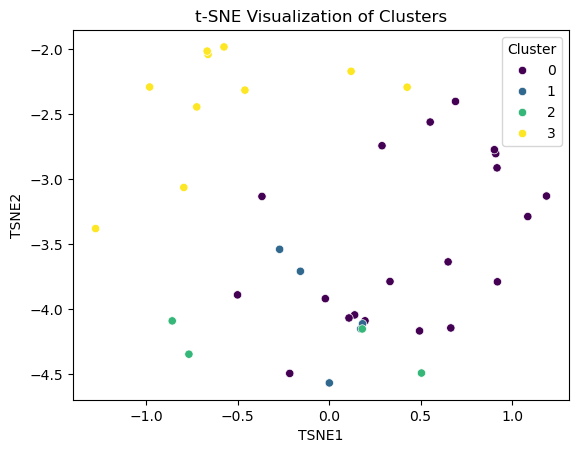

In [36]:
temp = outcome_df4.copy()

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(temp.drop('Cluster', axis=1))

# Plot
temp['TSNE1'] = tsne_results[:, 0]
temp['TSNE2'] = tsne_results[:, 1]
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=temp, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [38]:
for i in [0, 1, 2, 3]: 
    desired_cluster = i  # Example: Cluster number 0
    cluster_observations = outcome_df4[outcome_df4['Cluster'] == desired_cluster]

    # Display the observations in the desired cluster
    print(cluster_observations.index)

Index(['Education of mother: At least some secondary (Baseline)',
       'Education of father: At least some secondary (Baseline)',
       'Student has failed at least one school year (Baseline)',
       'Student works in own or family business (Baseline)',
       'Student part of income saved is non-zero (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)',
       'Student says they are a saver (Baseline)',
       'Student has formal savings (Baseline)',
       'Student makes a list of all monthly expenses (Baseline)',
       'Student saves money for future purchases (Baseline)',
       'Student has bought electronics shoes or clothing with credit card (Baseline)',
       'Parent has at least some secondary education (Baseline)',
       'Parent is an employee (Baseline)',
       'Parent is self-employeed (Baseline)',
       'Parent: makes a list of all monthly expenses (Baseline)',
       'Parent: has debit card (Baseline)', 'dumm_rp_21p_bl',
       'Parent: ha

### 5 clusters

In [39]:
baseline_df5 = follow_up_1_df[selected_columns]
baseline_df5 = baseline_df5.dropna()
outcome_df5 = baseline_df5.transpose()

In [40]:
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(outcome_df5)
outcome_df5['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 132976.0
Run 1, iteration: 2/100, moves: 5, cost: 129589.0
Run 1, iteration: 3/100, moves: 0, cost: 129589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12, cost: 132976.0
Run 2, iteration: 2/100, moves: 5, cost: 129589.0
Run 2, iteration: 3/100, moves: 0, cost: 129589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12, cost: 132976.0
Run 3, iteration: 2/100, moves: 5, cost: 129589.0
Run 3, iteration: 3/100, moves: 0, cost: 129589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 132976.0
Run 4, iteration: 2/100, moves: 5, cost: 129589.0
Run 4, iteration: 3/100, moves: 0, cost: 129589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations

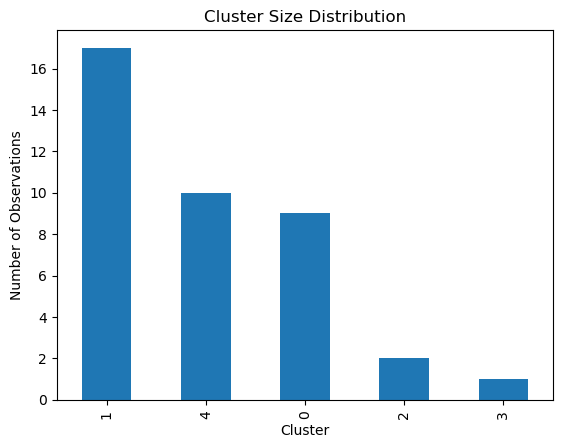

In [41]:
cluster_counts = outcome_df5['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Cluster Size Distribution')
plt.show()

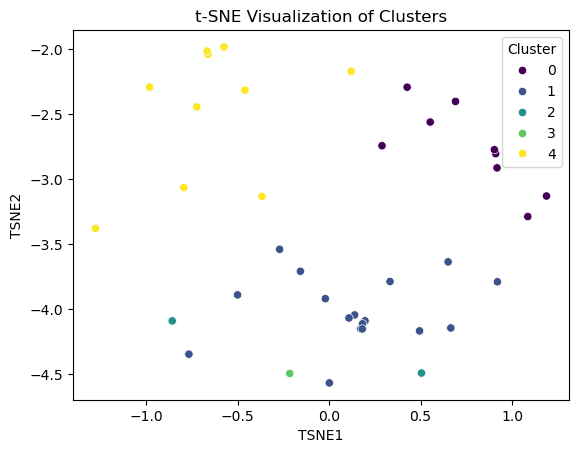

In [42]:
temp = outcome_df5.copy()

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(temp.drop('Cluster', axis=1))

# Plot
temp['TSNE1'] = tsne_results[:, 0]
temp['TSNE2'] = tsne_results[:, 1]
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=temp, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [45]:
for i in [0, 1, 2, 3, 4]: 
    desired_cluster = i  # Example: Cluster number 0
    cluster_observations = outcome_df4[outcome_df4['Cluster'] == desired_cluster]
    print(i)
    # Display the observations in the desired cluster
    print(cluster_observations.index)

0
Index(['Education of mother: At least some secondary (Baseline)',
       'Education of father: At least some secondary (Baseline)',
       'Student has failed at least one school year (Baseline)',
       'Student works in own or family business (Baseline)',
       'Student part of income saved is non-zero (Baseline)',
       'Student is behind on payments to bank or FI (Baseline)',
       'Student says they are a saver (Baseline)',
       'Student has formal savings (Baseline)',
       'Student makes a list of all monthly expenses (Baseline)',
       'Student saves money for future purchases (Baseline)',
       'Student has bought electronics shoes or clothing with credit card (Baseline)',
       'Parent has at least some secondary education (Baseline)',
       'Parent is an employee (Baseline)',
       'Parent is self-employeed (Baseline)',
       'Parent: makes a list of all monthly expenses (Baseline)',
       'Parent: has debit card (Baseline)', 'dumm_rp_21p_bl',
       'Parent: 